#5. 파이썬 날개 달기

##5-1 클래스

클래스의 필요성 : 같은 동작을 하는 객체를 무한히 찍어낼 수 있다..

###클래스와 객체

- 과자 틀 : 클래스
- 과자 틀을 이용해 만든 과자 : 객체(instance)

In [1]:
# 가장 간단한 클래스..
class Cookie:
    pass

In [2]:
a = Cookie()
b = Cookie()

In [3]:
type(a), type(b)

(__main__.Cookie, __main__.Cookie)

###사칙연산 클래스 만들기

- 먼저 구상하고 코딩하는 것이 좋다

####클래스 구조 만들기

In [4]:
class FourCal:
    pass

In [6]:
a = FourCal()

# 타입확인..
type(a)

__main__.FourCal

####객체에 숫자 지정할 수 있게 만들기 (setdata)

- 클래스 내의 함수는 메서드라고 한다
- 일반 함수와 달리 메서드의 첫 번째 매개변수 self는 특별한 의미를 갖는다

In [9]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second

**Self 매개변수의 활용**

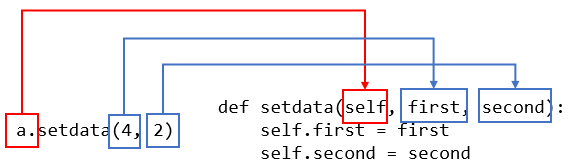

In [11]:
a = FourCal()

a.setdata(4,2)

In [12]:
# a 객체의 객체변수 first와 second에 각각 4와 2가 할당되었다.

print(a.first, a.second)

4 2


In [13]:
# 새로운 객체

b = FourCal()
b.setdata(3,7)

print(b.first, b.second)

3 7


-> 각 객체변수는 모두 독립적이며, 다른 주소에 저장된다.

In [14]:
# 다른 주소값에 저장된 것을 확인 할 수 있다.

print(id(a.first), id(b.first))

11256160 11256128


####더하기 기능 만들기

In [15]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second
    def add(self):
        result = self.first + self.second
        return result

In [16]:
a = FourCal()
a.setdata(4,2)

In [17]:
# a 객체의 객체변수 first, second가 각각 더해진다.

print(a.add())

6


####나머지 사칙연산 만들기

In [18]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second
    def add(self):
        result = self.first + self.second
        return result
    def mul(self):
        result = self.first * self.second
        return result
    def sub(self):
        result = self.first - self.second
        return result
    def div(self):
        result = self.first / self.second
        return result

In [19]:
a = FourCal()
a.setdata(4,2)

In [20]:
# 메서드 동작 확인
print(a.add())
print(a.mul())
print(a.sub())
print(a.div())

6
8
2
2.0


###생성자 (Constructor)

In [21]:
# 아직 객체변수 first와 second가 모두 초기화 되지 않음..

a = FourCal()
a.add()

AttributeError: ignored

setdata와 같은 역할을 하는게 _ _ init _ _이라는 이름을 가진 생성자 함수이다!

In [22]:
class FourCal:
    # 생성자 함수 추가
    def __init__(self, first, second):
        self.first = first
        self.second = second
    def add(self):
        result = self.first + self.second
        return result
    def mul(self):
        result = self.first * self.second
        return result
    def sub(self):
        result = self.first - self.second
        return result
    def div(self):
        result = self.first / self.second
        return result

In [24]:
# 생성자가 객체를 만들자마자 자동으로 호출됨
# 근데 first, second에 해당 인자가 없어서 오류..

a.FourCal()

AttributeError: ignored

생성자가 있으면 해당 포맷에 맞춰 초깃값을 전달해야 함

In [25]:
a = FourCal(4,2)

In [26]:
print(a.first, a.second)

4 2


In [27]:
# 메서드 동작 확인

print(a.add())
print(a.div())

6
2.0


###클래스의 상속

- 형식 : class 클래스 이름(상속할 클래스 이름):
- 상속받은 클래스의 모든 메서드를 사용할 수 있다.
- **메서드 오버라이딩**
    - 자식 클래스에서 부모 클래스와 동일한 이름을 갖는 메서드를 정의하는 것
    - 자식 클래스의 인스턴스가 생성되면 **자식 클래스의 메서드**를 따름

In [28]:
# 제곱 계산하는 연산이 포함된 클래스

class MoreFourCal(FourCal):
    # 기존 FourCal의 메서드도 활용가능
    
    def pow(self):
        result = self.first ** self.second
        return result

In [29]:
# 동작 확인
a = MoreFourCal(4,2)

In [30]:
print(a.pow())

16


**메서드 오버라이딩**

- 메서드 오버라이딩을 이용해서 0으로 나누었을 때 예외처리를 하는 클래스 생성

In [31]:
# 원 클래스는 에러발생

a = FourCal(4,0)
print(a.div())

ZeroDivisionError: ignored

In [32]:
class SafeFourCal(FourCal):
    def div(self):
        if self.second == 0:
            return 0
        else:
            result = self.first / self.second
            return result

In [33]:
a = SafeFourCal(4,0)
print(a.div())

0


연습) 곱하는 값이 0일 경우 'Fail' 문자열을 출력하는 클래스 FailFourCal을 만들자

In [34]:
class FailFourCal(FourCal):
    def mul(self):
        if self.second == 0:
            print('Fail')
        else:
            return self.first * self.second

In [36]:
a = FailFourCal(4,0)
print(a.mul())

Fail
None


###클래스 변수

- 클래스 선언할 때 변수 선언하면 클래스 변수임
- 해당 클래스로 만든 객체는 모두 같은 클래스 변수를 공유함
- 클래스 변수 변경도 가능

In [39]:
class Family:
    lastname = '김'     #클래스 변수

In [40]:
print(Family.lastname)

김


In [41]:
a = Family()
b = Family()
print(a.lastname, b.lastname)

김 김


In [42]:
Family.lastname = '박'

In [44]:
# 클래스 변수 바꾸면 모든 객체의 클래스변수 값도 변경됨

print(a.lastname, b.lastname)

박 박


In [45]:
# 클래스 변수 주소가 모두 동일 -> 같은 값을 공유..

print(id(Family.lastname))
print(id(a.lastname))
print(id(b.lastname))

140353617504496
140353617504496
140353617504496


##연습문제

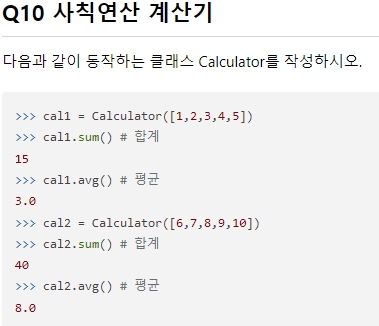

In [46]:
class Calculator():
    def __init__(self, nums):
        self.nums = nums
    
    def sum(self):
        result = sum(self.nums)
        return result
    
    def avg(self):
        return self.sum() / len(self.nums)

In [47]:
cal1 = Calculator([1,2,3,4,5])

In [48]:
cal1.sum()

15

In [50]:
cal1.avg()

3.0

In [51]:
cal2 = Calculator([6,7,8,9,10])

In [52]:
cal2.sum()

40

In [53]:
cal2.avg()

8.0